In [26]:
import numpy as np
import matplotlib.pyplot as plt
import plotutils as pu
from sympy.mpmath import nsum, inf, mp
from sympy import *
init_printing()
%matplotlib inline

The **Leibniz formula** states that:

$$
1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \ldots = \frac{\pi}{4}
$$

So in other words:

$$
\sum^{\infty}_{n = 0}\frac{(-1)^n}{2n + 1} = \frac{\pi}{4}
$$

Let's see if we can understand the sum formula first. What we'll do is just take the top part of the fraction $(-1)^n$ and the bottom part $2n + 1$ and plot them seperately for some values of $n$:

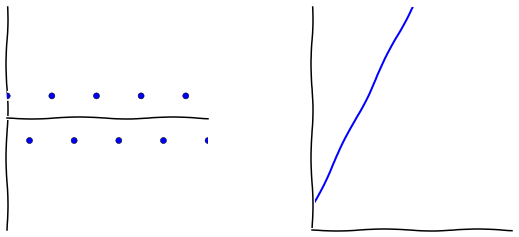

In [2]:
with plt.xkcd():
    x = np.arange(0, 10, 1)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    for ax in axes: pu.setup_axes(ax)
    axes[0].plot(x, (-1)**x, 'bo', zorder=10)
    axes[0].set_xlim(0, 9)
    axes[0].set_ylim(-5, 5)
    axes[1].plot(x, (2*x) + 1)
    axes[1].set_xlim(0, 9)
    axes[1].set_ylim(0, 10)

So as $n$ gets bigger and bigger we have two things. One flips between $1$ and $-1$ and the other is just a linear value $y = 2n + 1$ that just keeps on getting bigger and bigger. Now the equation above tells us that if we take an near infinite sum of these values we will get closer and closer to the value of $\frac{\pi}{4}$ so let's see if that's true.

Below are two lines, one line represents $y = \frac{(-1)^n}{2n + 1}$ and the other line is the sum of all the values of that equation for $y$ at $n = 0, 1, 2, \ldots, n$. You can see that it (slowly) converges to some value, namely the value $\frac{4}{\pi}$.

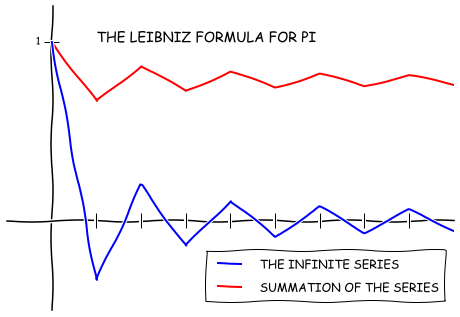

In [66]:
n = np.arange(0, 10, 1)
f = lambda x: ((-1)**x) / (2*x + 1)
with plt.xkcd():
    fig, axes = plt.subplots(1, figsize=(8, 8))
    pu.setup_axes(axes, xlim=(-1, 9), ylim=(-0.5, 1.2), yticks=[1], yticklabels=[1], xticks=[1,2,3,4,5,6,7,8])
    plt.plot(n, f(n), zorder=10, label='THE INFINITE SERIES')
    plt.plot(n, [nsum(f, [0, n]) for n in n], label='SUMMATION OF THE SERIES')
    plt.annotate('THE LEIBNIZ FORMULA FOR PI', (1, 1))
    axes.set_aspect(4.0)
    axes.legend(loc=4)

Now if we sum up all the terms of that line above for $x = 0, 1, 2, 3, \ldots, n$ we'll get closer and closer to $\frac{4}{\pi}$. Using `mpmath` we can calculate $\pi$ with pretty good detail using the `mp.dps` setting to control the precision.

In [28]:
leibniz = lambda n: ((-1)**n) / (2 * n + 1)
mp.dps = 50
nsum(leibniz, [0, inf]) * 4

mpf('3.1415926535897932384626433832795028841971693993751068')

Of course we can compute it symbolically as well. These fractions get pretty crazy real quickly.

In [42]:
leibniz = S('((-1)^n)/(2*n+1)')
n = S('n')
sum([leibniz.subs(n, i) for i in range(100)])